In [ ]:
def verify_watermark(data, id_list, private_key, watermark_identity, max_num_fields):
    """
    Return true if any record contains a valid watermark.
    """
    for record in data:
        if 'company_id' in record:
            valid_watermarks = validate_watermark_all([record], id_list, private_key, watermark_identity, max_num_fields)
            if valid_watermarks > 0:
                return True
    return False

Iteration 1: Remaining records = 25, Valid Watermarks Detected = 1
Iteration 2: Remaining records = 23, Valid Watermarks Detected = 1
Iteration 3: Remaining records = 21, Valid Watermarks Detected = 1
Iteration 4: Remaining records = 19, Valid Watermarks Detected = 1
Iteration 5: Remaining records = 17, Valid Watermarks Detected = 1
Iteration 6: Remaining records = 15, Valid Watermarks Detected = 1
Iteration 7: Remaining records = 13, Valid Watermarks Detected = 1
Iteration 8: Remaining records = 11, Valid Watermarks Detected = 0
Watermark verification failed after 8 iterations.


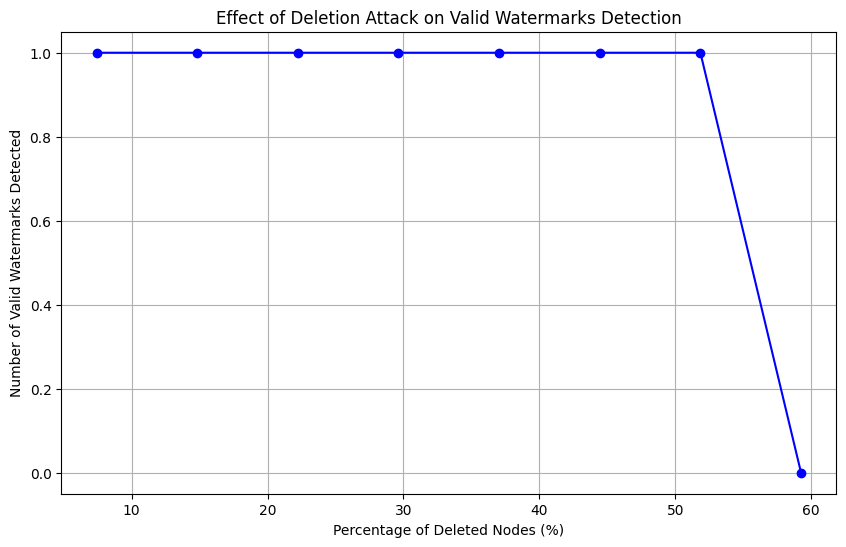

In [ ]:
def perform_deletion_attack(data, id_list, private_key, watermark_identity, max_num_fields, step=1):
    """
    Perform deletion attack while tracking valid watermarks.
    """
    total_records = len(data)
    deleted_nodes_percentage = []
    valid_watermarks_detected = []

    iterations = 0
    while data and verify_watermark(data, id_list, private_key, watermark_identity, max_num_fields):
        # Randomly delete `step` records
        for _ in range(step):
            if data:
                data.pop(random.randint(0, len(data) - 1))

        # Calculate the percentage of deleted nodes
        deleted_percentage = ((total_records - len(data)) / total_records) * 100
        deleted_nodes_percentage.append(deleted_percentage)

        # Validate watermarks in the remaining data
        valid_watermarks_records = validate_watermark_all(data, id_list, private_key, watermark_identity, max_num_fields)
        valid_watermarks_detected.append(valid_watermarks_records)  # Append here

        iterations += 1
        print(f"Iteration {iterations}: Remaining records = {len(data)}, Valid Watermarks Detected = {valid_watermarks_records}")

    print(f"Watermark verification failed after {iterations} iterations.")
    return deleted_nodes_percentage, valid_watermarks_detected

# Run the deletion attack
remaining_data = data.copy()  # To preserve the original dataset
deleted_nodes_percentage, valid_watermarks_detected = perform_deletion_attack(remaining_data, id_list, private_key, watermark_identity, max_num_fields, step=2)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(deleted_nodes_percentage, valid_watermarks_detected, marker='o', color='b')

# Adding labels and title
plt.title('Effect of Deletion Attack on Valid Watermarks Detection')
plt.xlabel('Percentage of Deleted Nodes (%)')
plt.ylabel('Number of Valid Watermarks Detected')
plt.grid(True)
plt.show()